In [128]:
import scipy.stats as sps
import numpy as np
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [129]:
eps = sps.norm(0, 0.2).rvs(size=500)
X = np.linspace(-8, 8, 500)
Y = 0.5*X + 1 + eps

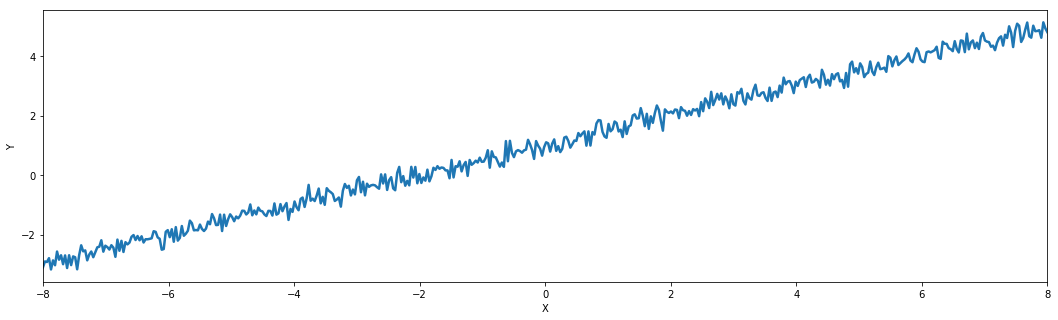

In [130]:
plt.figure(figsize = (18,5))
plt.plot(X, Y, linewidth = 2.5)
plt.xlim(-8,8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [140]:
def mse_fun((k, b)): return np.array([(Y[i] - k*X[i] - b)**2 for i in range(len(X))]).mean()
y_opt = scipy.optimize.minimize(mse_fun, (0, 0))

In [141]:
print y_opt.x

[ 0.49981004  1.01447643]


In [142]:
x_rec = np.linspace(-8, 8, 500)
y_rec = y_opt.x[0]*x_rec + y_opt.x[1]

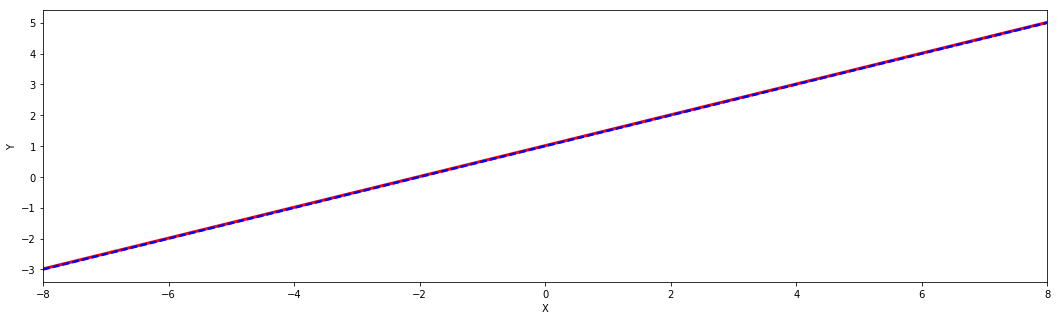

In [184]:
plt.figure(figsize = (18,5))
plt.plot(x_rec, y_rec, linewidth = 3, color = 'r')

x = np.linspace(-8, 8, 500)
y = 0.5 * x + 1

plt.plot(x, y, 'r--', linewidth=2.5, label = '0.5x + 1', color = 'b')

plt.xlim(-8,8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [154]:
eps_add = sps.norm(0, 0.2).rvs(size=75) 
x_add = np.linspace(-8, 8, 75)
y_add = -1 + eps_add
X_full = np.concatenate((X, x_add))
Y_full = np.concatenate((Y, y_add))

In [155]:
def full_mse_fun((k, b)): return np.array([(Y_full[i] - k*X_full[i] - b)**2 for i in range(len(X_full))]).mean()
y_full_mse = scipy.optimize.minimize(full_mse_fun, (0, 0))
def full_mae_fun((k, b)): return np.array([np.abs(Y_full[i] - k*X_full[i] - b) for i in range(len(X_full))]).mean()
y_full_mae = scipy.optimize.minimize(full_mae_fun, (0, 0)) 
print y_full_mse.x, y_full_mae.x

[ 0.43337888  0.76059773] [ 0.49273582  0.99545028]


In [158]:
x_full_mse_rec = np.linspace(-8, 8, 575)
y_full_mse_rec = y_full_mse.x[0]*x_full_mse_rec + y_full_mse.x[1]

In [160]:
x_full_mae_rec = np.linspace(-8, 8, 575)
y_full_mae_rec = y_full_mae.x[0]*x_full_mae_rec + y_full_mae.x[1]

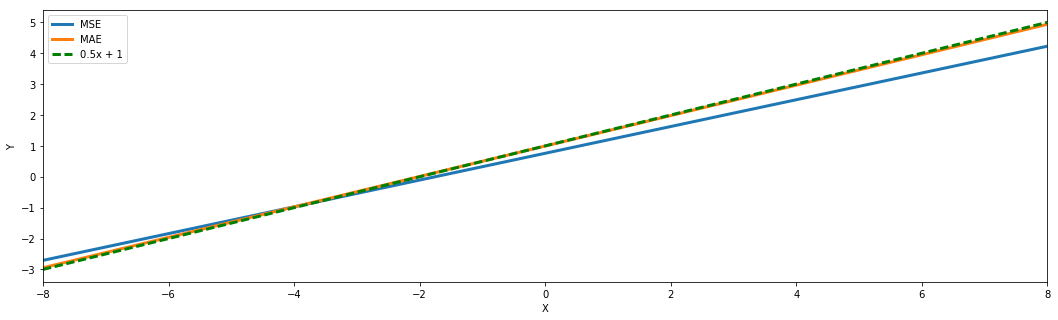

In [178]:
plt.figure(figsize = (18,5))
plt.plot(x_full_mse_rec, y_full_mse_rec, linewidth=3, label = 'MSE')
plt.plot(x_full_mae_rec, y_full_mae_rec, linewidth=3, label = 'MAE')

plt.plot(x, y, 'r--', linewidth=3, label = '0.5x + 1', color = 'g')

plt.legend()
plt.xlim(-8,8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Вывод: модель, оптимизирующая MAE, более устойчива к выбросам, чем модель, оптимизирующая MSE.